## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../Resources/Mouse_metadata.csv"
study_results_path = "../Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


# Combine the data into a single dataset
study_data_merged = pd.merge(study_results, mouse_metadata, how="left", on=("Mouse ID", "Mouse ID") )
# Display the data table for preview
study_data_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [2]:
# Checking the number of mice.
study_data_merged["Mouse ID"].count()

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
find_duplicate = study_data_merged[["Mouse ID", "Timepoint"]]

duplicate_rows = find_duplicate[find_duplicate.duplicated()]

print("Duplicate Rows :")
duplicate_rows

Duplicate Rows :


,Mouse ID,Timepoint
137,g989,0
360,g989,5
681,g989,10
869,g989,15
1111,g989,20


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_data_merged.sort_values("Mouse ID", inplace = True) 

clean_mouse_data = study_data_merged.drop_duplicates(subset="Mouse ID", keep='first', inplace=False, ignore_index=False) 
clean_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
113,a203,0,45.000000,0,Infubinol,Female,20,23
1731,a251,40,63.095076,1,Infubinol,Female,21,25
1382,a262,30,64.958092,3,Placebo,Female,17,29
986,a275,20,50.513437,1,Ceftamin,Female,20,28
1070,a366,20,57.285987,0,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
499,z435,10,48.710661,0,Propriva,Female,12,26
1638,z578,40,34.022093,0,Ramicane,Male,11,16
504,z581,10,50.478750,2,Infubinol,Female,24,25
1572,z795,35,60.435654,2,Naftisol,Female,13,29


In [6]:
# Checking the number of mice in the clean DataFrame.
print("Mouse Count:")
clean_mouse_data["Mouse ID"].count()

Mouse Count:


249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_stats = study_data_merged[["Tumor Volume (mm3)", "Drug Regimen"]]

tumor_mean = tumor_stats.groupby(['Drug Regimen']).mean()["Tumor Volume (mm3)"].map("{:,.2f}".format)
tumor_median = tumor_stats.groupby(['Drug Regimen']).median()["Tumor Volume (mm3)"].map("{:,.2f}".format)
tumor_var = tumor_stats.groupby(['Drug Regimen']).var()["Tumor Volume (mm3)"].map("{:,.2f}".format)
tumor_std = tumor_stats.groupby(['Drug Regimen']).std()["Tumor Volume (mm3)"].map("{:,.2f}".format)
tumor_sem = tumor_stats.groupby(['Drug Regimen']).sem()["Tumor Volume (mm3)"].map("{:,.2f}".format)


# Assemble the resulting series into a single summary dataframe.

final_tumor_stats = pd.DataFrame({"Mean": tumor_mean, 
                                  "Median": tumor_median, 
                                  "Variance": tumor_var,
                                  "Standard Deviation": tumor_std,
                                  "SEM":tumor_sem
                                 })
final_tumor_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.85,42.35,6.51,0.51
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_tumor_stats = tumor_stats.groupby(['Drug Regimen']).describe().round(2)
agg_tumor_stats


#aggregated_stats = final_tumor_stats.aggregate(func=list, axis=1)
#aggregated_stats_df = pd.DataFrame(aggregated_stats)
#print("Statistics: Mean, Median, Variance, Standard Deviation, SEM")
#aggregated_stats_df

Tumor Volume (mm3)                                           \
                          count   mean   std    min    25%    50%    75%   
Drug Regimen                                                               
Capomulin                 230.0  40.68  4.99  23.34  37.69  41.56  45.00   
Ceftamin                  178.0  52.59  6.27  45.00  47.21  51.78  56.80   
Infubinol                 178.0  52.88  6.57  36.32  47.31  51.82  57.31   
Ketapril                  188.0  55.24  8.28  45.00  48.23  53.70  60.87   
Naftisol                  186.0  54.33  8.13  45.00  47.29  52.51  59.96   
Placebo                   181.0  54.03  7.82  45.00  47.46  52.29  59.92   
Propriva                  161.0  52.32  6.51  45.00  47.08  50.85  56.18   
Ramicane                  228.0  40.22  4.85  22.05  36.67  40.67  45.00   
Stelasyn                  181.0  54.23  7.71  45.00  48.05  52.43  58.72   
Zoniferol                 182.0  53.24  6.97  45.00  47.34  51.82  57.95   

                     
                max  
Drug Regimen         
Capomulin     48.16  
Ceftamin      68.92  
Infubinol     72.23  
Ketapril      78.57  
Naftisol      76.67  
Placebo       73.21  
Propriva      72.46  
Ramicane      47.62  
Stelasyn      75.12  
Zoniferol     73.32

## Bar and Pie Charts

Text(0, 0.5, 'Measurements Taken')

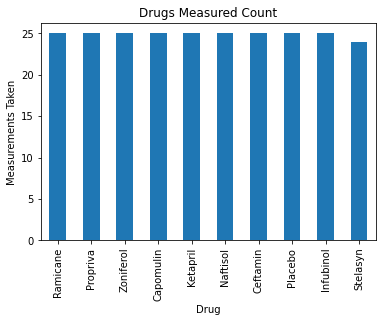

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Get the number of measurements taken for each drug
drug_measured = clean_mouse_data["Drug Regimen"].value_counts()
drug_measured

# Create a bar chart for the count of each drug measured

drug_measured.plot(kind="bar")

plt.title("Drugs Measured Count")
plt.xlabel("Drug")
plt.ylabel("Measurements Taken")



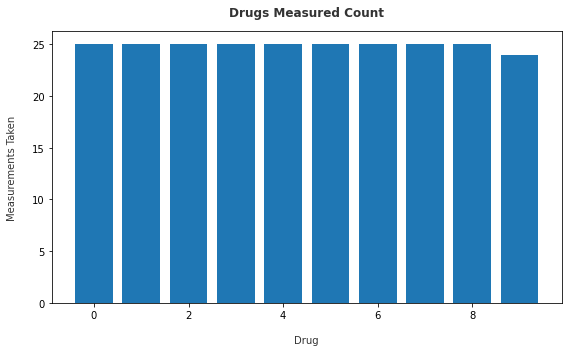

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplotplt.bar(
plt.rcParams['figure.figsize'] = (8, 5)

fig, ax = plt.subplots()

plt.bar(
    x=np.arange(drug_measured.size),
    height=drug_measured
)
# Set labels and title
ax.set_xlabel('Drug', labelpad=15, color='#333333')
ax.set_ylabel('Measurements Taken', labelpad=15, color='#333333')
ax.set_title('Drugs Measured Count', pad=15, color='#333333',
             weight='bold')



fig.tight_layout()

Text(0.5, 1.0, 'Mice Gender Distribution')

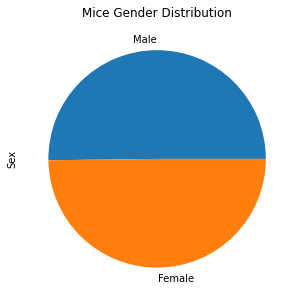

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender = clean_mouse_data[["Sex"]]
mice_gender_counts = mice_gender["Sex"].value_counts()

mice_gender_counts.plot(kind="pie")
plt.title("Mice Gender Distribution")


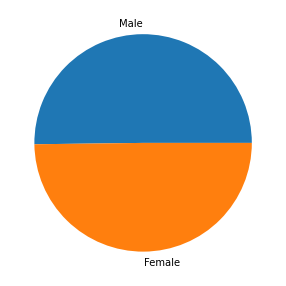

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Male', 'Female']

plt.pie(mice_gender_counts, labels = labels)

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
